# Second Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/SecondSession.ipynb)


## Part 1: A crash course about First Order Ordinary Differential equations and their simulation

An first order ordinary differential equation is an equation of the form $$\begin{cases}y':=\frac{dy}{dt}=g(y,t) \\ y(t_{0})=y_{0}\end{cases}$$
We are going to assume $g\in C^{\infty}(\mathbb{R}^{k},\mathbb{R})$
If $g$ is lipschitz in $y$ so  $$\left|\left|\frac{dg}{dy}(y,t)\right|\right|\le K(t) \forall t$$  and $$g(t,y)$$ is continuous in $t$ so
$$ \lim \limits_{t→t_{1}}g(t,y)=g(t_{1},y) \quad \forall y,t_{1}
$$ 
then the ODE has an unique solution and so the problem is well defined.
We restrict to first order ODE's because ODEs of greater order can be reconducted to first order using change of variables.

Some first order ODEs can be solved explicitly, for example given
$$\begin{cases}y'=-yt \\ y(0)=1 \end{cases}$$ we divide by $y$, and multiply by $dt$ to obtain $$\frac{dy}{y}=tdt$$, so if we integrate we get $$\ln(y)=-\frac{t^{2}}{2}+c$$ or $$y=ce^{-\frac{t^{2}}{2}}$$
By substiting $y(0)=1$ we get $c=1$, so the final solution is $$y=e^{-\frac{t^{2}}{2}}$$

Howewer not all equations can be solved explicitly, for example the equation
$$y'=y+sin(y)$$ can't be solved explictly, even if it has a unique solution.

So we need numerical methods to simulate their solution.

One of the most used are the Finite Difference method, which approximate the derivative.

### Forward Euler method

We know that $\lim\limits _{h \rightarrow 0}\frac{y(t+h)-y(t)}{h}=y'(t)$
So $$\lim\limits _{h \rightarrow 0}\frac{y(t+h)-y(t)}{h}=g(t,y)$$ and if $h$ is small we have $$y(t+h)\approx y(t)+hg(t,y(t))$$
So starting from $t_{0}$, supposing we want the value in $t_{e}$ we could choose a number $n$ of intermediate points and discretize our time in $$t_{i}=t_{0}+i\frac{t_{e}-t_{0}}{n}$$ and do
$$y_{i}=y_{i-1}+hg(t_{i-1},y_{i-1})$$ where 
$$y_{i} \approx y(t_{i-1})$$

This method is called forward euler method. Let's code it.

In [3]:
def forward_euler(g,t0,t_e,y0,n):
  h=(t_e-t0)/n
  y=np.zeros(n+1)
  y[0]=y0
  t=np.linspace(t0,t_e,n+1)
  for i in range(1,n+1):
    y[i]=y[i-1]+h*g(t[i-1],y[i-1])
  return y,t



Now let's test it on our example $y'=-yt$

1.   List item
2.   List item



L2 error is  0.20177562425048975


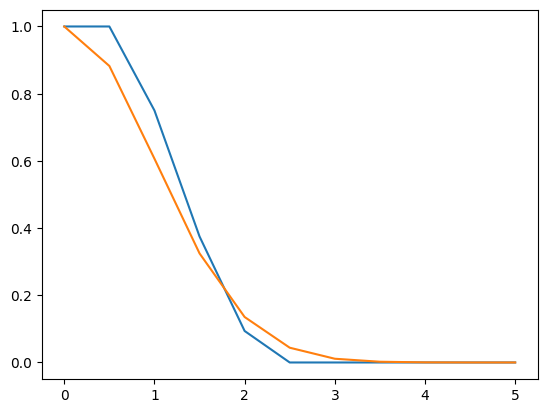

In [4]:
import numpy as np
g= lambda x,t : -x*t
y= lambda t: np.exp(-t**2/2)
t0=0
y0=1
t_e=5
n=10
y_approx,t=forward_euler(g,t0,t_e,y0,n)
y_true=y(t)
import matplotlib.pyplot as plt
plt.plot(t,y_approx)
plt.plot(t,y_true)
print("L2 error is ",np.linalg.norm(y_true-y_approx) )

Let's try to increase the number of intermediate points

L2 error is  0.0015192116782519643


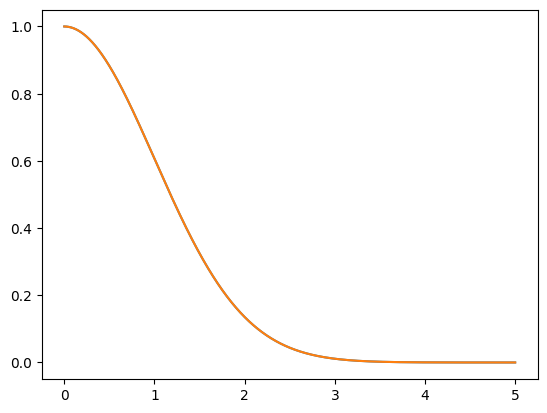

In [5]:
n=100000
y_approx,t=forward_euler(g,t0,t_e,y0,n)
y_true=y(t)
plt.plot(t,y_approx)
plt.plot(t,y_true)
print("L2 error is ",np.linalg.norm(y_true-y_approx) )

Much better.

Howewer this method has it's drawbacks. Consider $$\begin{cases} y'=y+e^{2x} \\ y(0)=1\end{cases}$$

The solution is $e^{2x}$. Let's pretend we don't know it and let's try to apply the euler algorithm.

L2 error is  inf


/tmp/ipykernel_37610/3828521638.py:2: RuntimeWarning: overflow encountered in exp
  g= lambda x,t : x+np.exp(2*t)


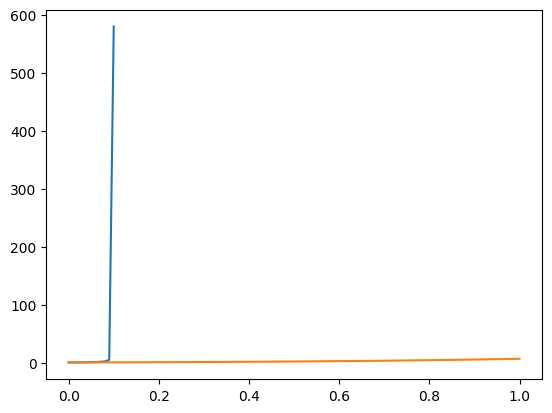

In [6]:
import numpy as np
g= lambda x,t : x+np.exp(2*t)
y= lambda t: np.exp(2*t)
t0=0
y0=1
t_e=1
n=100
y_approx,t=forward_euler(g,t0,t_e,y0,n)
y_true=y(t)
import matplotlib.pyplot as plt
plt.plot(t,y_approx)
plt.plot(t,y_true)
print("L2 error is ",np.linalg.norm(y_true-y_approx) )

It does not work very well. Let's try to increase the points.

/tmp/ipykernel_37610/3828521638.py:2: RuntimeWarning: overflow encountered in exp
  g= lambda x,t : x+np.exp(2*t)


L2 error is  inf


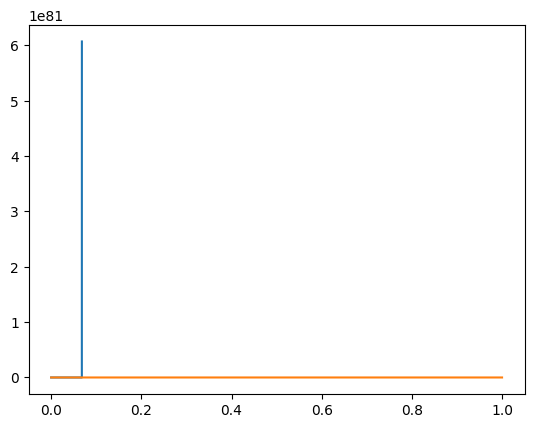

In [7]:
n=10000
y_approx,t=forward_euler(g,t0,t_e,y0,n)
y_true=y(t)
import matplotlib.pyplot as plt
plt.plot(t,y_approx)
plt.plot(t,y_true)
print("L2 error is ",np.linalg.norm(y_true-y_approx) )

The problem get's worse. Why? (Question time)

For our luck, there exists much more advanced solvers (which use more than one point at a time). One is in scipy.

L2 error is  25279.751914650307


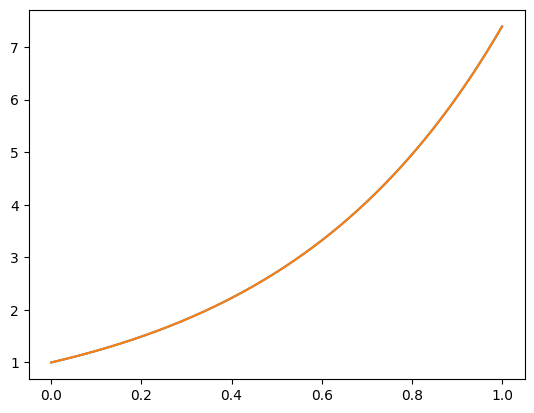

In [8]:
from scipy.integrate import odeint
n=10000
t=np.linspace(t0,t_e,n)
y_approx=odeint(g,y0,t)
y_true=y(t)
plt.plot(t,y_approx)
plt.plot(t,y_true)
print("L2 error is ",np.linalg.norm(y_true-y_approx) )

It wooooorks!!!!!!

## Part 2: Continous Dynamical Systems and their simulation
A continuos dinamical system is described by and ode $\dot{X}=g(X,t)$.

If $g$ depends only on $X$ the dynamical system is called autonomous.
In this case the solutions of $g(X)=0$ are called equilibrium points of the system and are indicated with $X_{e}$.
If:
- $g'(X_{e})< 0$ then the points is an attractive/stable equilibrium point (it exists an enough small perturbation such that the system returns to the equilibrium point)
- $g'(X_{e})> 0$ then the point is an unstable equilibrium point (it does not exists an enough small perturbation such that the system returns to the equilibrium point)


## Basic Theory

The Gizburg Landau equation is $\dot{X}=aX-X^{3}=g(X)$

The zeros of $g$ are $x=0$ ($\forall a$ ), $x=-\sqrt{a}$, $x=\sqrt{a}$ (only if $a>0$). 

Also $g'(0)=a$, $g'(-\sqrt{a})=g'(\sqrt{a})=-a$.

So:
- if $a>0$ $x_{1}=0$ is an unstable point and $x_{2}=\sqrt{a}$ and
 $x_{3}=-\sqrt{a}$ are locally stable points
- if $a<0$ $x_{1}=0$ is globally stable point



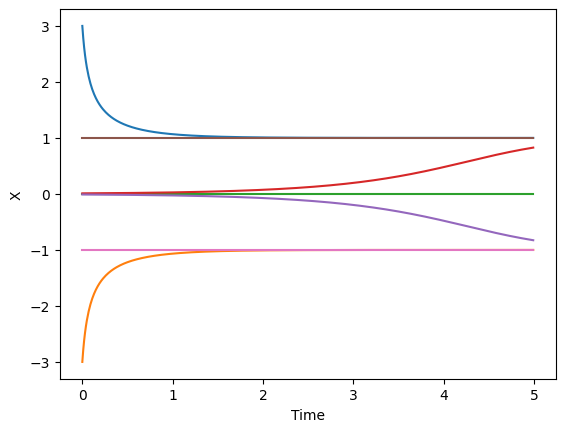

In [9]:
import scipy
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

class DynamicalSystem1D(object):
  def __init__(self):
      super().__init__()

  def ode(x,t):
    pass
  
  def solve(self,x0,t):
    return scipy.integrate.odeint(self.ode,x0,t)

  def plot(self,xlist,t):
    
    for x0 in xlist:
      x=self.solve(x0,t)
      plt.plot(t,x)
    plt.xlabel("Time")
    plt.ylabel("X")

class ginzburg_landau(DynamicalSystem1D):
  def __init__(self,a):
    super().__init__()
    self.a=a

  def ode(self,x,t):
    return self.a*x-x**3

  def plot(self,x0,t):
    super().plot(x0,t)

a=1

ginzburg_landau(a).plot([3,-3,0,0.01,-0.01,sqrt(a),-sqrt(a)],np.arange(500)/100)


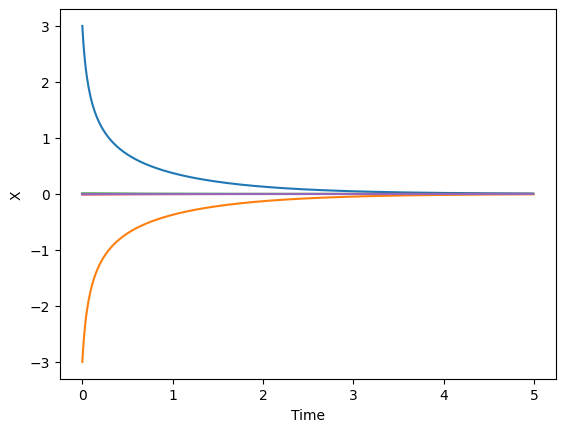

In [11]:
a=-1
ginzburg_landau(a).plot([3,-3,0.01,-0.01,0],np.arange(500)/100)


Question time!!!

Let's verify your answer.


In [10]:
class SimplePositiveSquaredDS(DynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def ode(self,x,t):
    return x**2

  def plot(self,x0,t):
    super().plot(x0,t)
    
    
class SimpleNegativeSquaredDS(DynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def ode(self,x,t):
    return -x**2

  def plot(self,x0,t):
    super().plot(x0,t)

    
class SimplePositiveSquaredDS(DynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def ode(self,x,t):
    return x**2

  def plot(self,x0,t):
    super().plot(x0,t)
    
    
class SimplePositiveCubicDS(DynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def ode(self,x,t):
    return x**3

  def plot(self,x0,t):
    super().plot(x0,t)
    
    
class SimpleNegativeCubicDS(DynamicalSystem1D):
  def __init__(self):
    super().__init__()

  def ode(self,x,t):
    return -x**3

  def plot(self,x0,t):
    super().plot(x0,t)


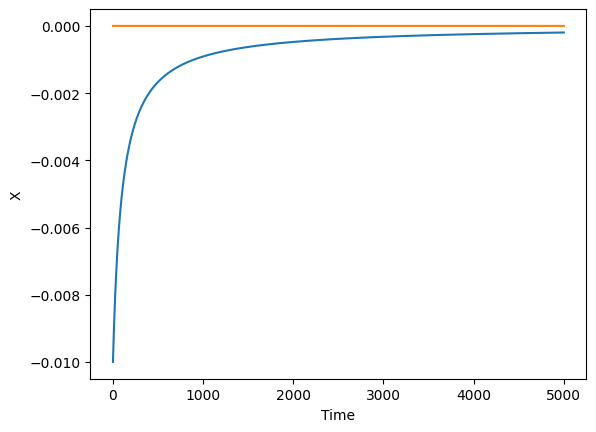

In [24]:
PS=SimplePositiveSquaredDS()
PS.plot([-0.01,0],np.arange(500000)/100)

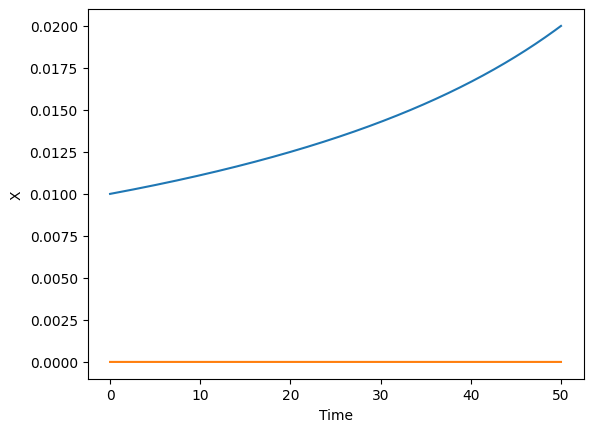

In [28]:
PS=SimplePositiveSquaredDS()
PS.plot([0.01,0],np.arange(5000)/100)